# ConvNet with PyTorch

In [1]:
# Importing needed libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Setting the device (gpu or cpu)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [3]:
# Getting our data
batch_size = 32

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))]
)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                          shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


cat   frog  automobile automobile truck ship  bird  dog   bird  truck automobile automobile deer  dog   automobile ship  truck dog   dog   truck ship  frog  ship  cat   frog 


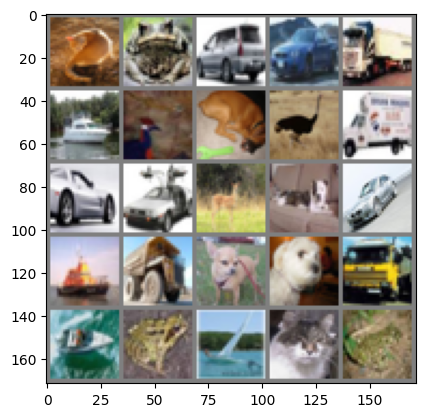

In [4]:
# Plotting some images from the dataset
classes = ('airplane', 'automobile', 'bird', 'cat', 
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(imgs):
    imgs = imgs/2+0.5 #unnormalize
    np_imgs = imgs.numpy()
    plt.imshow(np.transpose(np_imgs, (1,2,0)))
    plt.show

#one batch of random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

im_grid = torchvision.utils.make_grid(images[0:25], nrow=5)
imshow(im_grid)
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(25)))

### Visual representation of the Model structure

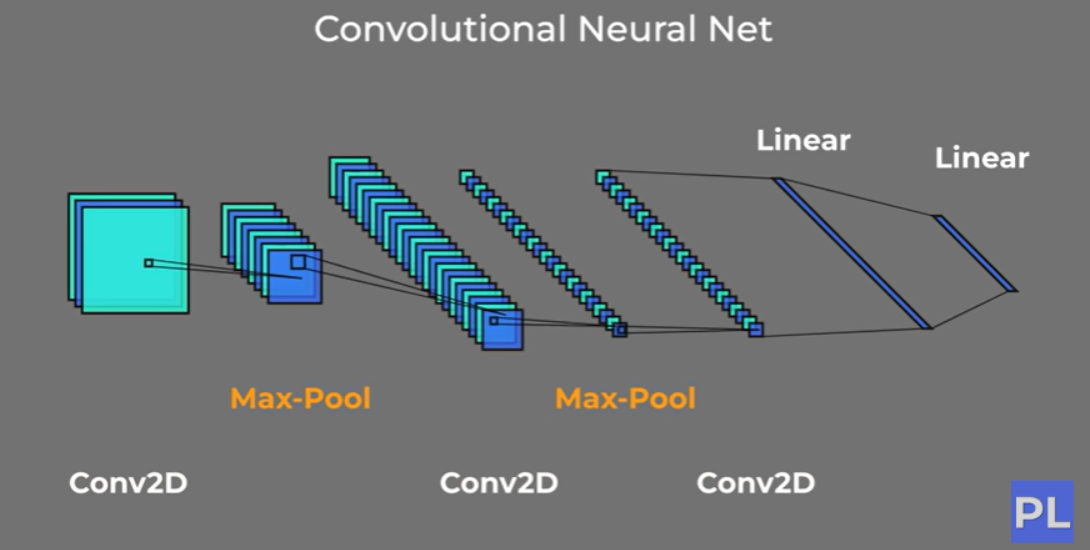

### Model structure in code

In [5]:
#Model
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 64, 3)
        self.fc1 = nn.Linear(64*4*4, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


model = ConvNet().to(device)   

In [6]:
#Loss and criterion

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [7]:
#Training loop
steps_per_epoch = len(trainloader)

for epoch in range(10):
    running_loss = 0.0
    for (inputs, labels) in trainloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        #forward + loss
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        #backward + optimizer
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'[{epoch +1}] loss: {running_loss/steps_per_epoch:.3f}')

print('Train is finished')
    

[1] loss: 1.493
[2] loss: 1.126
[3] loss: 0.957
[4] loss: 0.854
[5] loss: 0.776
[6] loss: 0.714
[7] loss: 0.665
[8] loss: 0.618
[9] loss: 0.578
[10] loss: 0.539
Train is finished


In [8]:
 #Evaluation

n_correct = 0
n_total = 0

model.eval()

with torch.no_grad():
    for(images, labels) in testloader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)

        #take class with highest value as prediction
        _, predicted = torch.max(outputs.data, 1)

        n_total += labels.size(0)
        n_correct += (predicted == labels).sum().item()

print(f"Accuracy on test set: {n_correct/n_total:.3f}")

Accuracy on test set: 0.729
